In [1]:
!pip install gensim
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 20.0 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import gensim
import numpy as np
import spacy
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.corpora import Dictionary
from sklearn.metrics.pairwise import cosine_similarity
import pyLDAvis.gensim
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from wordcloud import WordCloud
warnings.filterwarnings("ignore")


In [3]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [4]:
from google.colab import drive
import shutil

drive.mount('/content/gdrive')

source_path = '/content/gdrive/MyDrive/dataset_text_mining/pre_processed.csv'

destination_path = '/content/dataset_yelp.csv'

shutil.copyfile(source_path, destination_path)

Mounted at /content/gdrive


'/content/dataset_yelp.csv'

In [5]:
remove_words = ['never','ever','couldnot','wouldnot','could','would','us',"i'm","you'd", 'like', 'liked', 'likes', 'love', 'loved', 'loving', 'enjoy', 'enjoyed', 'enjoying',
    'admire', 'admired', 'admiring', 'prefer', 'preferred', 'prefers', 'fantastic',
    'amazing', 'wonderful', 'excellent', 'good', 'great', 'awesome', 'best', 'perfect',
    'nice', 'beautiful', 'charming', 'delightful', 'favorite', 'pleased', 'satisfied',
    'happy', 'content', 'dislike', 'disliked', 'dislikes', 'hate', 'hated', 'hating', 'detest', 'detested',
    'detesting', 'loathe', 'loathing', 'annoyed', 'annoying', 'frustrating', 'frustrated',
    'upset', 'terrible', 'awful', 'horrible', 'worst', 'bad', 'poor', 'dissatisfied',
    'unhappy', 'displeased', 'ugly', 'disappointing', 'disappointed', 'mediocre', 'food', 'place','time', 'service', 'go', 'get', 'back', 'one', 'really', 'also']

In [6]:
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    tokens = text.split()
    stop_words = set(stopwords.words('english') + remove_words)
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    cleaned_text = ' '.join(tokens)
    return cleaned_text


In [7]:
df = pd.read_csv('/content/dataset_yelp.csv')
df.head()

Unnamed: 0               review_id                 user_id  \
0           4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ   
1          10  rGQRf8UafX7OTlMNN19I8A  1WHRWwQmZOZDAhp2Qyny4g   
2          12  XW_LfMv0fV21l9c6xQd_lw  9OAtfnWag-ajVxRbUTGIyg   
3          13  8JFGBuHMoiNDyfcxuWNtrA  smOvOajNG0lS4Pq7d8g4JQ   
4          15  OAhBYw8IQ6wlfw1owXWRWw  1C2lxzUo1Hyye4RFIXly3g   

              business_id  stars_x  useful  funny  cool  \
0  e4Vwtrqf-wpJfwesgvdgxQ      4.0       1      0     1   
1  uMvVYRgGNXf5boolA9HXTw      5.0       2      0     0   
2  lj-E32x9_FA7GmUrBGBEWg      4.0       0      0     0   
3  RZtGWDLCAtuipwaZ-UfjmQ      4.0       0      0     0   
4  BVndHaLihEYbr76Z0CMEGw      5.0       0      0     0   

                                                text                 date  \
0  Cute interior and owner (?) gave us tour of up...  2017-01-14 20:54:15   
1  My experience with Shalimar was nothing but wo...  2015-06-21 14:48:06   
2  Love going here for happy hour or dinner!  Gre...  2014-06-27 22:44:01   
3  Good food--loved the gnocchi with marinara\nth...  2009-10-14 19:57:14   
4  Great place for breakfast! I had the waffle, w...  2014-10-11 16:22:06   

   ... Mexican Beauty & Spas Pubs Cajun/Creole Event Planning & Services  \
0  ...       0             0    0            0                         0   
1  ...       0             0    0            0                         0   
2  ...       0             0    0            0                         0   
3  ...       0             0    0            0                         0   
4  ...       0             0    0            0                         0   

   Venues & Event Spaces  Bakeries  Hotels  Specialty Food  Main_category  
0                      0         0       0               0     Sandwiches  
1                      0         0       0               0       Shopping  
2                      0         0       0               0           Bars  
3                      0         0       0               0          Pizza  
4                      0         0       0               0     Sandwiches  

[5 rows x 56 columns]

In [8]:
df['preprocessed_text'] = df['text'].apply(preprocess_text)

In [9]:
df[['text', 'preprocessed_text']].head()

text  \
0  Cute interior and owner (?) gave us tour of up...   
1  My experience with Shalimar was nothing but wo...   
2  Love going here for happy hour or dinner!  Gre...   
3  Good food--loved the gnocchi with marinara\nth...   
4  Great place for breakfast! I had the waffle, w...   

                                   preprocessed_text  
0  cute interior owner gave tour upcoming patioro...  
1  experience shalimar nothing wanted engagement ...  
2  going hour dinner patio fan beat stl heat also...  
3  foodloved gnocchi marinara baked eggplant appe...  
4  breakfast waffle fluffy home fry smashed crunc...

In [10]:
tokenized_text = df['preprocessed_text'].str.split()
dictionary = Dictionary(tokenized_text)
corpus = [dictionary.doc2bow(text) for text in tokenized_text]

In [11]:
from gensim.models import TfidfModel

#tfidf_model = TfidfModel(corpus)

#tfidf_corpus = [tfidf_model[doc] for doc in corpus]


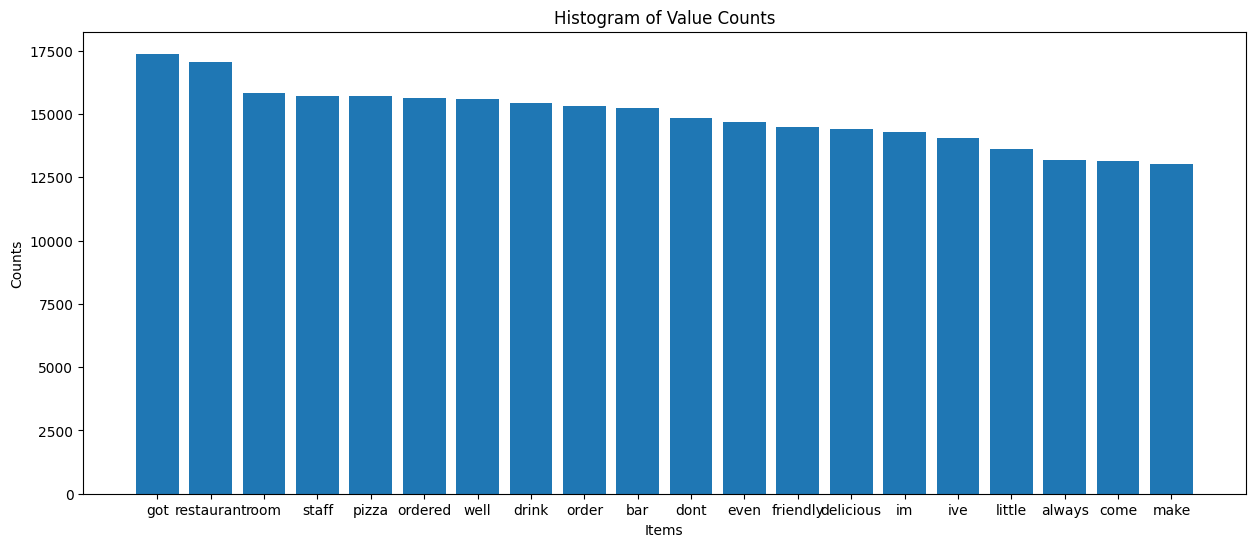

In [12]:
from collections import Counter

all_words = ' '.join(df['preprocessed_text']).split()
word_freq = Counter(all_words)
most_common = word_freq.most_common(20)
words, counts = zip(*most_common)

plt.figure(figsize=(15, 6))
plt.bar(words, counts)
plt.xlabel('Items')
plt.ylabel('Counts')
plt.title('Histogram of Value Counts')
plt.show()



In [13]:
coherence_scores = []
for num_topics in range(10, 20):
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)
    coherence_model = CoherenceModel(model=lda_model, texts=tokenized_text, dictionary=dictionary, coherence='c_v')
    coherence_scores.append((num_topics, coherence_model.get_coherence()))

best_num_topics = max(coherence_scores, key=lambda x: x[1])[0]
print(f"Optimal number of topics: {best_num_topics}")

KeyboardInterrupt: 

In [14]:
ldamodel = LdaModel(corpus=corpus, num_topics=16, id2word=dictionary, alpha='auto', eta='auto')

In [15]:
ldamodel.show_topics(num_topics=5)

[(3,
  '0.139*"pizza" + 0.020*"crust" + 0.017*"cheese" + 0.015*"delivery" + 0.012*"pie" + 0.011*"topping" + 0.011*"sauce" + 0.011*"order" + 0.010*"slice" + 0.009*"thin"'),
 (7,
  '0.070*"bar" + 0.057*"music" + 0.039*"drink" + 0.031*"night" + 0.027*"game" + 0.027*"fun" + 0.025*"bartender" + 0.024*"live" + 0.018*"priced" + 0.015*"band"'),
 (0,
  '0.021*"table" + 0.015*"minute" + 0.015*"drink" + 0.014*"came" + 0.013*"order" + 0.012*"wait" + 0.011*"server" + 0.011*"got" + 0.009*"didnt" + 0.009*"took"'),
 (10,
  '0.010*"customer" + 0.010*"said" + 0.008*"didnt" + 0.008*"told" + 0.007*"got" + 0.007*"even" + 0.007*"asked" + 0.007*"day" + 0.007*"called" + 0.006*"dont"'),
 (8,
  '0.019*"burger" + 0.016*"chicken" + 0.015*"ordered" + 0.014*"fry" + 0.014*"salad" + 0.013*"cheese" + 0.012*"sandwich" + 0.010*"sauce" + 0.009*"got" + 0.007*"side"')]

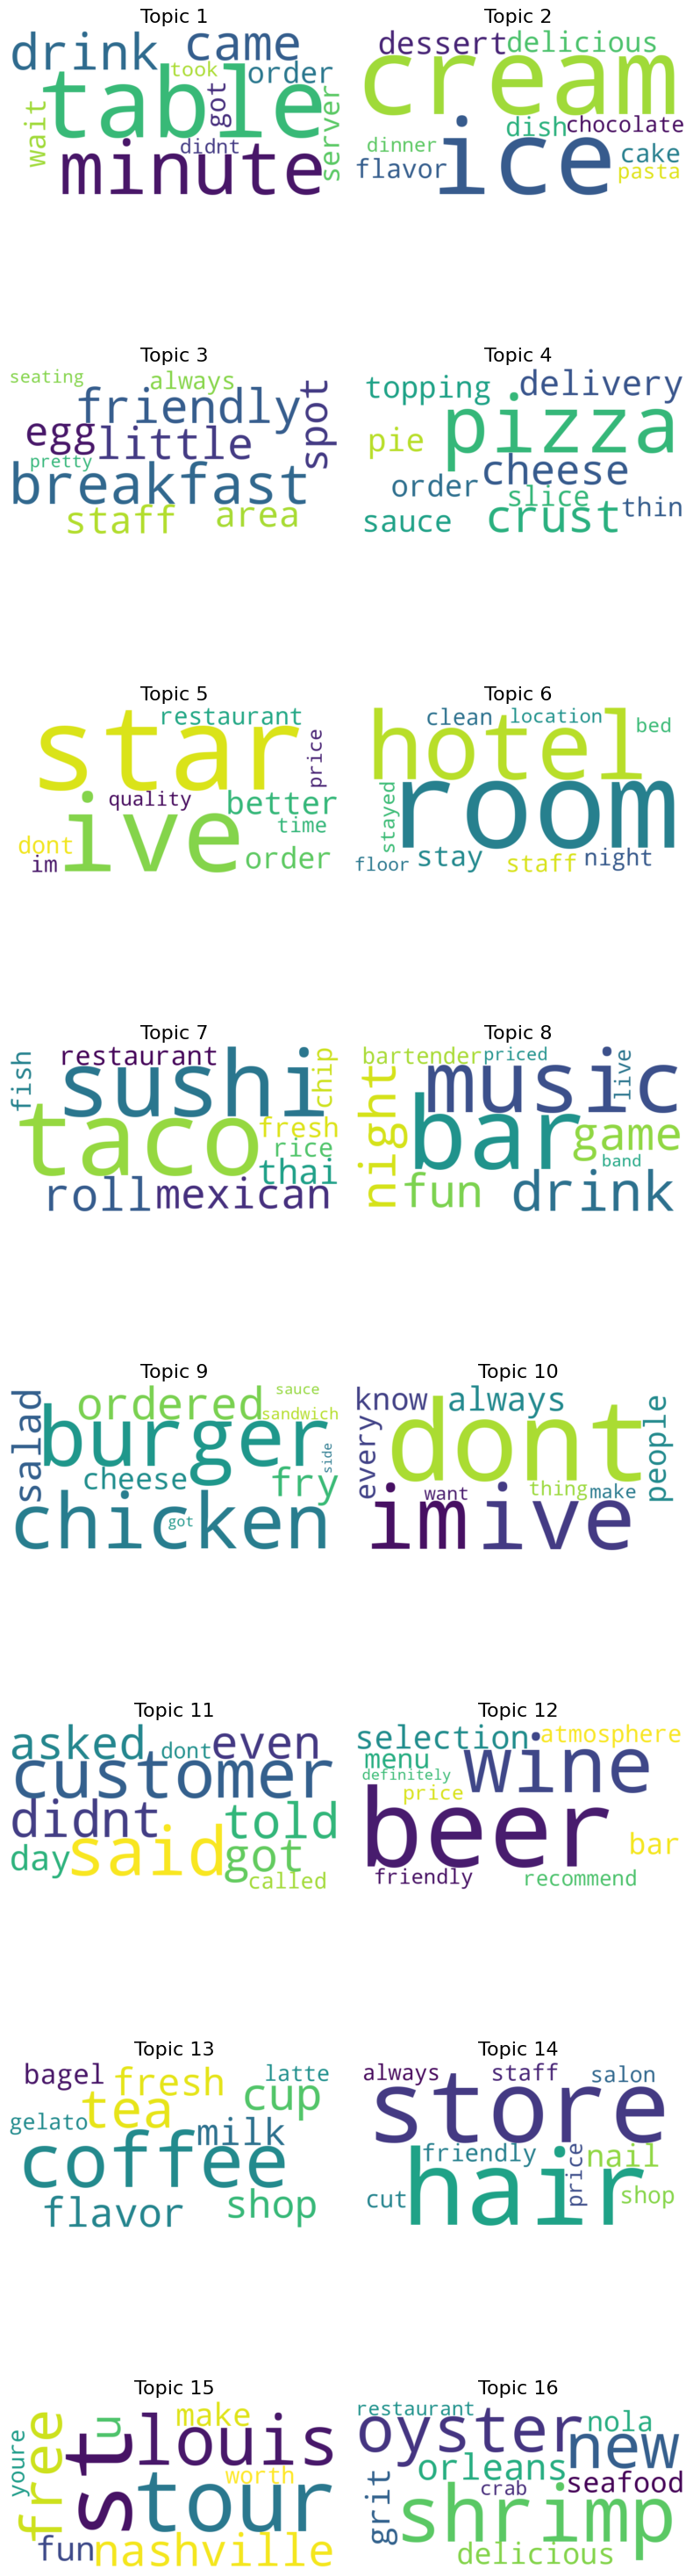

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import math

num_topics = 16
num_columns = 2
num_rows = math.ceil(num_topics / num_columns)


fig, axes = plt.subplots(num_rows, num_columns, figsize=(8, num_rows * 4), sharex=True, sharey=True)
axes = axes.flatten()


for i in range(num_topics):
    topic_words = dict(ldamodel.show_topic(i, 10))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis("off")
    axes[i].set_title(f"Topic {i+1}", fontsize=16)

for j in range(num_topics, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

In [17]:
ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]
lda_coherence = CoherenceModel(topics=ldatopics[:10], texts=tokenized_text, dictionary=dictionary, window_size=10).get_coherence()
print(f"Topic coherence: {lda_coherence}")

Topic coherence: 0.5091855643968184


In [18]:
lda_ppl = ldamodel.log_perplexity(corpus)
print(f"Topic log perplexity: {lda_ppl}")

Topic log perplexity: -8.981541221907573


In [19]:
perplexity = np.exp(-lda_ppl)
print(f"Topic perplexity: {perplexity}")

Topic perplexity: 7954.882912296083


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

ntexts = [' '.join(text) for text in tokenized_text]

vectorizer = TfidfVectorizer(
    max_features=None, stop_words="english"
)
vectorizer.fit(ntexts)


topics = [' '.join([t[0] for t in topic]) for topicid, topic in ldamodel.show_topics(formatted=False)]
topics = [vectorizer.transform([topic]).toarray() for topic in topics]
topics_matrix = np.concatenate(topics, axis=0)
similarities = cosine_similarity(topics_matrix)
topic_diversity = 1 - np.mean(similarities)
print(f"Topic Diversity: {topic_diversity}")

Topic Diversity: 0.8807253957903632


In [21]:
doc_topic_distributions = [ldamodel.get_document_topics(doc) for doc in corpus]

In [22]:
from collections import defaultdict
topic_counts = defaultdict(float)
for doc_topics in doc_topic_distributions:
    for topic, prob in doc_topics:
        topic_counts[topic] += prob

total_docs = len(corpus)
topic_proportions = {topic: count / total_docs for topic, count in topic_counts.items()}

print("\nOverall Topic Distribution in Corpus:")
for topic, proportion in topic_proportions.items():
    print(f"  Topic {topic}: {proportion:.4f}")


Overall Topic Distribution in Corpus:
  Topic 3: 0.0286
  Topic 8: 0.1260
  Topic 9: 0.0707
  Topic 11: 0.0536
  Topic 12: 0.0326
  Topic 13: 0.0534
  Topic 14: 0.0181
  Topic 0: 0.1031
  Topic 7: 0.0238
  Topic 10: 0.0964
  Topic 1: 0.0381
  Topic 2: 0.0922
  Topic 5: 0.0672
  Topic 4: 0.0495
  Topic 15: 0.0449
  Topic 6: 0.0657


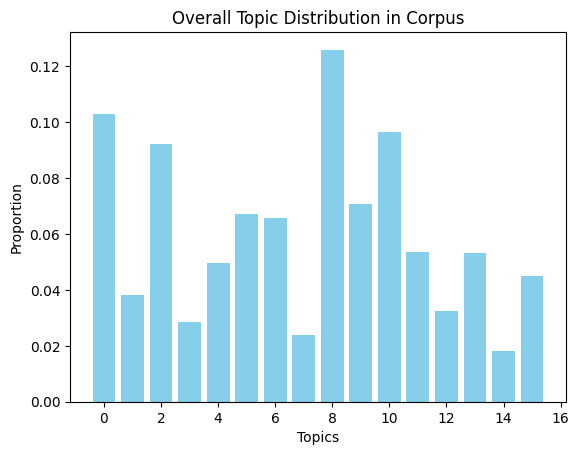

In [23]:
import matplotlib.pyplot as plt

topics = list(topic_proportions.keys())
proportions = list(topic_proportions.values())

plt.bar(topics, proportions, color='skyblue')
plt.xlabel("Topics")
plt.ylabel("Proportion")
plt.title("Overall Topic Distribution in Corpus")
plt.show()

# BERTopic

In [27]:
!pip install bertopic
!pip install sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.5 MB/s eta 0:00:00


In [28]:
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic

In [26]:
def soft_text_normalization(text):
  text = re.sub(r'[^a-zA-Z\s]', '', text)
  text = re.sub(r'\d+', '', text)
  text = text.lower()
  return text

df['bert_cleaned'] = df['text'].apply(soft_text_normalization)
docs = df['bert_cleaned'].tolist()
len(docs)

92376

In [29]:
sentence_model = SentenceTransformer('all-MiniLM-L6-v2')
topic_model = BERTopic(embedding_model=sentence_model, verbose=True)

topics, probs = topic_model.fit_transform(docs)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2025-01-21 23:26:08,897 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/2887 [00:00<?, ?it/s]

2025-01-21 23:28:04,936 - BERTopic - Embedding - Completed ✓
2025-01-21 23:28:04,938 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-01-21 23:30:18,535 - BERTopic - Dimensionality - Completed ✓
2025-01-21 23:30:18,539 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-01-21 23:30:32,952 - BERTopic - Cluster - Completed ✓
2025-01-21 23:30:32,977 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-01-21 23:30:38,505 - BERTopic - Representation - Completed ✓


In [30]:
topic_model.visualize_topics()

In [32]:
topic_model.visualize_barchart(top_n_topics=10)

In [35]:
tokenized_documents = [doc.split() for doc in docs]
dictionary = Dictionary(tokenized_documents)

topic_words = topic_model.get_topics()
bertopic = [[word for word, _ in topic_words[topic_id]] for topic_id in topic_words]
bert_coherence = CoherenceModel(topics=bertopic[:10], texts=tokenized_documents, dictionary=dictionary, window_size=10).get_coherence()
print(f"Topic coherence: {bert_coherence}")

Topic coherence: 0.637323691955192


In [ ]:
ntexts = [' '.join(text) for text in tokenized_documents]

vectorizer = TfidfVectorizer(
    max_features=None, stop_words="english"
)
vectorizer.fit(ntexts)


topics = [' '.join([t[0] for t in topic]) for topicid, topic in topic_model.find_topics()]
topics = [vectorizer.transform([topic]).toarray() for topic in topics]
topics_matrix = np.concatenate(topics, axis=0)
similarities = cosine_similarity(topics_matrix)
topic_diversity = 1 - np.mean(similarities)
print(f"Topic Diversity: {topic_diversity}")

In [36]:
top_n_words = 10
all_words = [word for topic_id in topic_words for word in topic_words[topic_id][:top_n_words]]

unique_words = set(all_words)
diversity_score = len(unique_words) / len(all_words)
print("Diversity Score:", diversity_score)

Diversity Score: 1.0
